In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Read the CSV file
file_with_pvals = 'test_results.csv'
df = pd.read_csv(file_with_pvals)

# Display the first few rows of the dataframe
print(df.head())

   Tester                         Metric    Groups       P-Value
0  Elling            Requests per Driver   0 vs 10  4.380000e-01
1  Elling            Requests per Driver   0 vs 20  6.250000e-08
2  Elling            Requests per Driver  10 vs 20  1.310000e-07
3  Elling  Completed Requests per Driver   0 vs 10  8.200000e-01
4  Elling  Completed Requests per Driver   0 vs 20  4.330000e-06


In [25]:
# Extract columns of interest and the index
testname_column1 = 'Metric'
testname_column2 = 'Groups'
pval_column = 'P-Value'
test_names = df[testname_column1].values + ' ' + df[testname_column2].values
p_values = df[pval_column].values
indices = df.index.values

In [26]:
# Sort by p-values
sort_indices = np.argsort(p_values)
sorted_p_values = p_values[sort_indices]
sorted_test_names = test_names[sort_indices]
dataframe_indices = indices[sort_indices]

In [27]:
# Specify alpha
alpha = 0.05

# Find largest j
j = 0
n = len(sorted_p_values)
#sorted_pvals = np.sort(sorted_p_values)
threshold = (np.arange(1, n+1) / n) * alpha
below_threshold = sorted_p_values < threshold
if any(below_threshold):
    max_j = np.where(below_threshold)[0][-1]
    j = max_j + 1  # because index starts at 0

# Determine which hypotheses to reject
rejected = np.zeros(len(p_values), dtype=bool)
if j > 0:
    rejected[sort_indices[:j]] = True

In [28]:
# Add the 'rejected' column to the dataframe
df['rejected'] = rejected

# Output the dataframe to a new CSV file
df.to_csv('benj_hoch_results.csv', index=False)

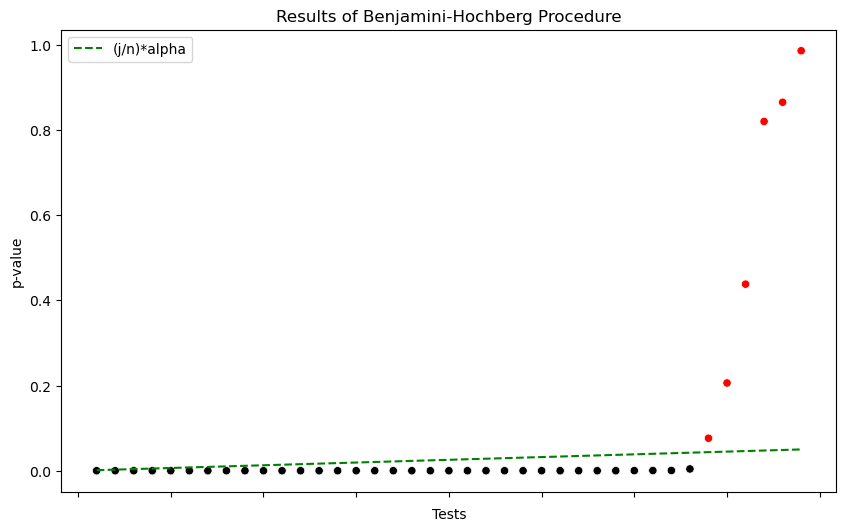

In [30]:
# Create the plot
plt.figure(figsize=(10, 6))
x = np.arange(1, len(sorted_p_values) + 1)

# Plot the p-values
sns.scatterplot(x=x, y=sorted_p_values, hue=rejected[sort_indices], palette={True: 'black', False: 'red'}, legend=False)

# Plot the line (j/n)*alpha
plt.plot(x, (x/len(sorted_p_values))*alpha, color='green', linestyle='dashed', label='(j/n)*alpha')

plt.title('Results of Benjamini-Hochberg Procedure')
plt.xlabel('Tests')
plt.ylabel('p-value')
#plt.yscale('log')
#plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter())
plt.gca().xaxis.set_ticklabels([])  # Remove x-axis tick labels
plt.legend()
plt.show()